In [9]:
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Loading the data.

In [18]:
from utils import mnist_reader
X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

In [16]:
print("Number of images for training: {}".format(X_train.shape[0]))
print("Number of images for testing: {}".format(X_test.shape[0]))

Number of images for training: 60000
Number of images for testing: 10000


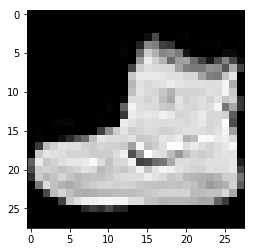

In [21]:
plt.imshow(X_train[0,:].reshape(28, 28), cmap='gray')

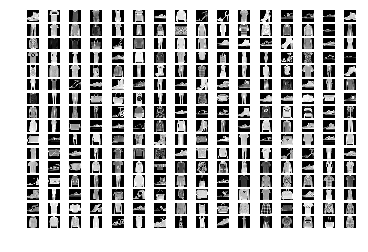

In [27]:
from itertools import product

gridSize=16

for ind in range(gridSize*gridSize):
    plt.subplot(gridSize, gridSize, ind+1)
    plt.imshow(X_train[ind, :].reshape(28, 28), cmap="gray")
    plt.axis("off")

In [40]:
Labels = ["T-shirt/top",
"Trouser",
"Pullover",
"Dress",
"Coat",
"Sandal",
"Shirt",
"Sneaker",
"Bag",
"Ankle boot"]

l, c = np.unique(y_train, return_counts=True)

for idx, count in zip(l, c):
    print("{0}: {1}".format(Labels[idx], count))

T-shirt/top: 6000
Trouser: 6000
Pullover: 6000
Dress: 6000
Coat: 6000
Sandal: 6000
Shirt: 6000
Sneaker: 6000
Bag: 6000
Ankle boot: 6000


Build your first network in Keras. Simple softmax model.

In [54]:
from keras.models import Sequential
from keras.layers import Dense, Activation
import keras.metrics as metrics

model = Sequential()
model.add(Dense(units=10, input_dim=X_train.shape[1]))
model.add(Activation('softmax'))


def top3_acc(ytrue, ypred):
    return metrics.top_k_categorical_accuracy(ytrue, ypred, k=3)

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.01),
             metrics=[metrics.categorical_accuracy, top3_acc])

In [44]:
from keras.utils import to_categorical
y_train_ohe = to_categorical(y_train)

In [55]:
history = model.fit(X_train, y_train_ohe, epochs=5, batch_size=32)

Epoch 1/5
60000/60000 [==============================] - 2s - loss: 14.5069 - categorical_accuracy: 0.0999 - top3_acc: 0.9985     
Epoch 2/5
60000/60000 [==============================] - 2s - loss: 14.3517 - categorical_accuracy: 0.1095 - top3_acc: 0.9996     
Epoch 3/5
60000/60000 [==============================] - 2s - loss: 13.5850 - categorical_accuracy: 0.1570 - top3_acc: 0.9999     
Epoch 4/5
60000/60000 [==============================] - 2s - loss: 13.1444 - categorical_accuracy: 0.1844 - top3_acc: 0.9999     
Epoch 5/5
60000/60000 [==============================] - 2s - loss: 13.0029 - categorical_accuracy: 0.1932 - top3_acc: 1.0000     


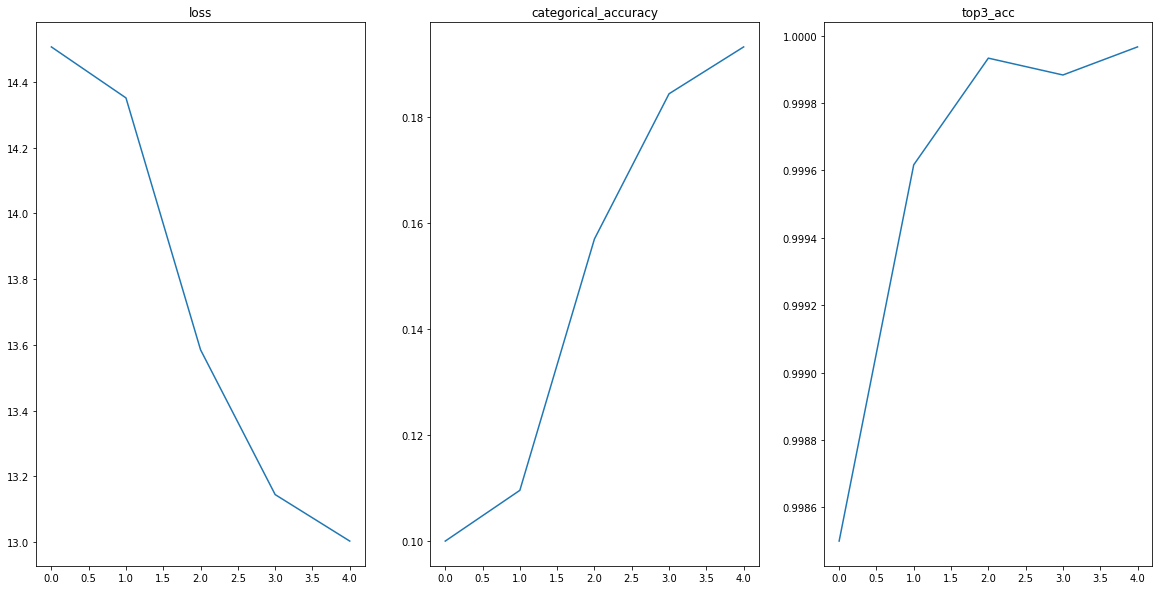

In [67]:
plt.figure(figsize=(20,10))

for i, (name, values) in enumerate(history.history.items()):
    plt.subplot(1, len(history.history.items()), i+1)
    plt.plot(values)
    plt.title(name)

In [111]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

predictions = model.predict(X_test).argmax(axis=1)

print("Accuracy: ")

print(accuracy_score(predictions, y_test))

print("\n\n")

print("Confusion matrix: ")

print(confusion_matrix(predictions, y_test))

print("\n\n")

print(classification_report(predictions, y_test, target_names=Labels))

Accuracy: 
0.1954



Confusion matrix: 
[[   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   2    0    1    1    1  977    0  999   23  992]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [ 998 1000  999  999  999   23 1000    1  977    8]
 [   0    0    0    0    0    0    0    0    0    0]]



             precision    recall  f1-score   support

T-shirt/top       0.00      0.00      0.00         0
    Trouser       0.00      0.00      0.00         0
   Pullover       0.00      0.00      0.00         0
      Dress       0.00      0.00      0.00         0
       Coat       0.00      0.00      0.00         0
     Sandal       0.98      0.33      0.49      2996
      Shirt       0.00      0.00      0.00         0
 

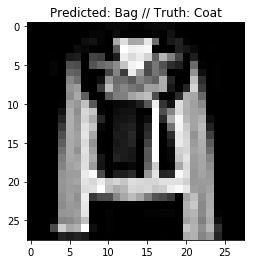

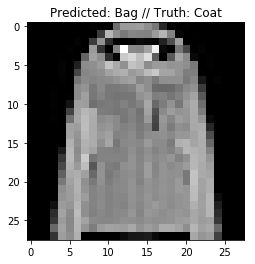

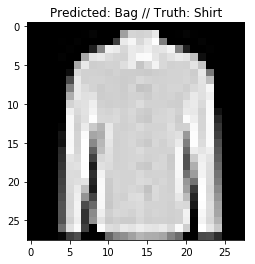

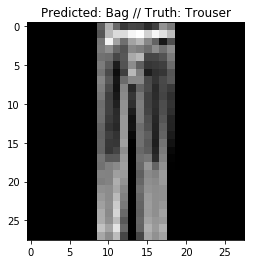

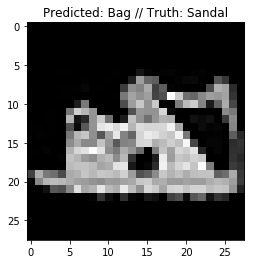

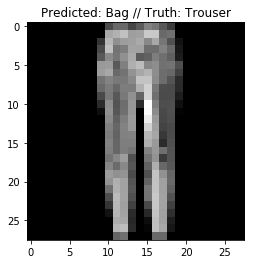

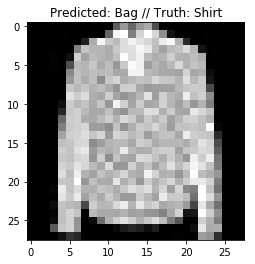

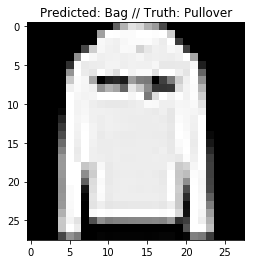

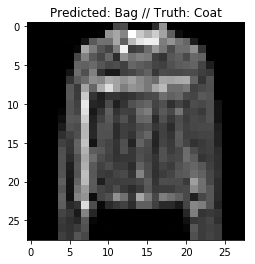

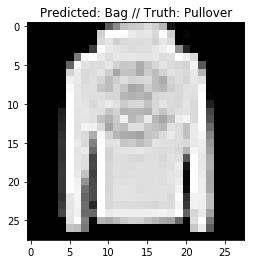

In [109]:
import random

wrong_predictions = (predictions != y_test)

n_wp = wrong_predictions.sum()

N = 10

for i in range(N):
    
    idx = random.choice(range(n_wp))
    plt.figure()
    plt.imshow(X_test[wrong_predictions,::][idx,::].reshape(28, 28), cmap="gray")
    
    
    plt.title("Predicted: {0} // Truth: {1}".format(
        Labels[predictions[wrong_predictions][idx]],
        Labels[y_test[wrong_predictions][idx]]
    ))